In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Training data")
print(f"- X = {train_images.shape}, y = {train_labels.shape}")
print(f"- Hols {train_images.shape[0]/70000* 100}% of the overall data")

print("\n")

print("Testing data")
print(f"- X = {test_images.shape}, y = {test_labels.shape}")
print(f"- Hols {test_images.shape[0]/70000* 100}% of the overall data")

Training data
- X = (60000, 28, 28), y = (60000,)
- Hols 85.71428571428571% of the overall data


Testing data
- X = (10000, 28, 28), y = (10000,)
- Hols 14.285714285714285% of the overall data


In [7]:
def plot_images(nb_images_to_plot, train_data):
    import random
    import matplotlib.pyplot as plt

    # Generate a list of random indices from the training data
    random_indices = random.sample(range(len(train_data)), nb_images_to_plot)

    # Plot each image using the random indices
    for i, idx in enumerate(random_indices):
        plt.subplot(330 + 1 + i)
        plt.imshow(train_data[idx], cmap=plt.get_cmap('gray'))

    plt.show()


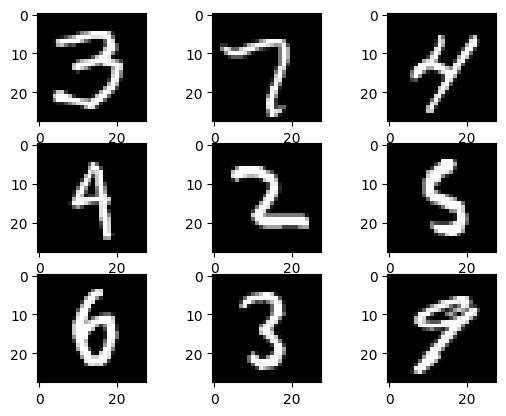

In [8]:
nb_images_to_plot = 9
plot_images(nb_images_to_plot, train_images)

In [9]:
import numpy as np

def plot_labels_distribution(data_labels):
    
	counts = np.bincount(data_labels)

	plt.style.use('seaborn-dark-palette')

	fig, ax = plt.subplots(figsize=(10,5))
	ax.bar(range(10), counts, width=0.8, align='center')
	ax.set(xticks=range(10), xlim=[-1, 10], title='Training data distribution')

	plt.show()

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_20216\690874400.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


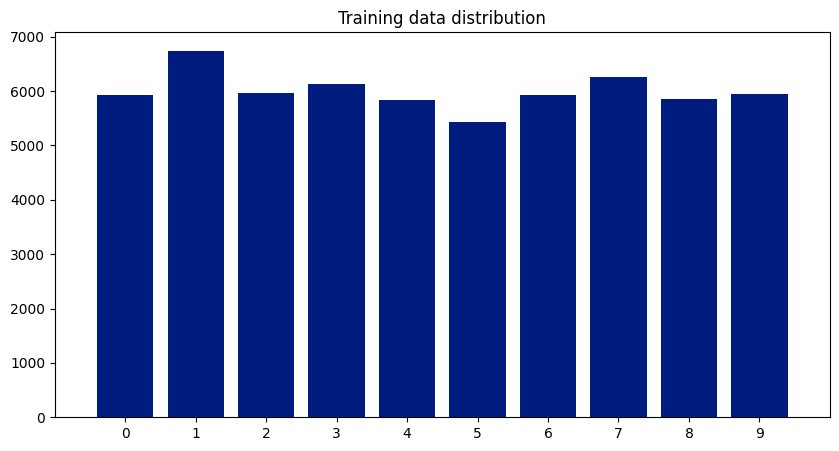

In [10]:
plot_labels_distribution(train_labels)

In [11]:
from keras.utils import to_categorical

def preprocess_data(data, label,
                	vector_size,
                	grayscale_size):
    
	# Normalize to range 0-1
	preprocessed_images = data.reshape((data.shape[0],
                             	vector_size)).astype('float32') / grayscale_size
    
	# One-hot encode the labels
	encoded_labels = to_categorical(label)
    
	return preprocessed_images, encoded_labels

In [12]:
# Flattening variable
vector_size = 28 * 28

grayscale_size = 255
train_size = train_images.shape[0]
test_size = test_images.shape[0]

# Preprocessing of the training data
train_images, train_labels = preprocess_data(train_images,
                                         	train_labels,
                                         	vector_size,
                                         	grayscale_size)

# Preprocessing of the testing data
test_images, test_labels = preprocess_data(test_images,
                                       	test_labels,
                                       	vector_size,
                                       	grayscale_size)

In [13]:
print("Training data")
print(f"- Maxium Value {train_images.max()} ")
print(f"- Minimum Value {train_images.min()} ")

print("\n")

print("Testing data")
print(f"- Maxium Value {test_images.max()} ")
print(f"- Minimum Value {test_images.min()} ")

Training data
- Maxium Value 1.0 
- Minimum Value 0.0 


Testing data
- Maxium Value 1.0 
- Minimum Value 0.0 


In [14]:
# One hot encoding of the test data labels
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
# One hot encoding of the train data labels
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
from keras import models
from keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization 

In [17]:
hidden_units = 256
nb_unique_labels = 10
vector_size = 784  # Assuming a 28x28 input image for example

def define_network_architecture():

	network = models.Sequential()
	network.add(Dense(vector_size, activation='relu', input_shape=(vector_size,)))  # Input layer
	network.add(Dense(512, activation='relu'))                       	# Hidden layer
	network.add(Dense(nb_unique_labels, activation='softmax'))  

	return network

In [18]:
network = define_network_architecture()

c:\Users\Rutuja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
import keras.utils
print(dir(keras.utils))


['CustomObjectScope', 'FeatureSpace', 'Progbar', 'PyDataset', 'Sequence', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'array_to_img', 'audio_dataset_from_directory', 'clear_session', 'custom_object_scope', 'deserialize_keras_object', 'disable_interactive_logging', 'enable_interactive_logging', 'get_custom_objects', 'get_file', 'get_registered_name', 'get_registered_object', 'get_source_inputs', 'image_dataset_from_directory', 'img_to_array', 'is_interactive_logging_enabled', 'is_keras_tensor', 'legacy', 'load_img', 'model_to_dot', 'normalize', 'pack_x_y_sample_weight', 'pad_sequences', 'plot_model', 'register_keras_serializable', 'save_img', 'serialize_keras_object', 'set_random_seed', 'split_dataset', 'standardize_dtype', 'text_dataset_from_directory', 'timeseries_dataset_from_array', 'to_categorical', 'unpack_x_y_sample_weight']


In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

# Example model creation
model = Sequential([
    Dense(64, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])

# Plot the model architecture and save it as an image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [27]:
network.compile(optimizer='rmsprop',
            	loss='categorical_crossentropy',
            	metrics=['accuracy'])

In [28]:
# Fit the model
batch_size = 256
n_epochs = 15
val_split = 0.2
patience_value = 5

# Fit the model with the callback
history = network.fit(train_images, train_labels, validation_split=val_split,
        	epochs=n_epochs, batch_size=batch_size)

Epoch 1/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8145 - loss: 0.5725 - val_accuracy: 0.9632 - val_loss: 0.1244
Epoch 2/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9627 - loss: 0.1187 - val_accuracy: 0.9688 - val_loss: 0.0966
Epoch 3/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9784 - loss: 0.0706 - val_accuracy: 0.9616 - val_loss: 0.1249
Epoch 4/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9863 - loss: 0.0447 - val_accuracy: 0.9728 - val_loss: 0.0918
Epoch 5/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9899 - loss: 0.0310 - val_accuracy: 0.9712 - val_loss: 0.1021
Epoch 6/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9930 - loss: 0.0207 - val_accuracy: 0.9756 - val_loss: 0.0884
Epoch 7/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.9592 - val_loss: 0.1450
Epoch 8/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.9970 - loss: 0.0098 - val_ac

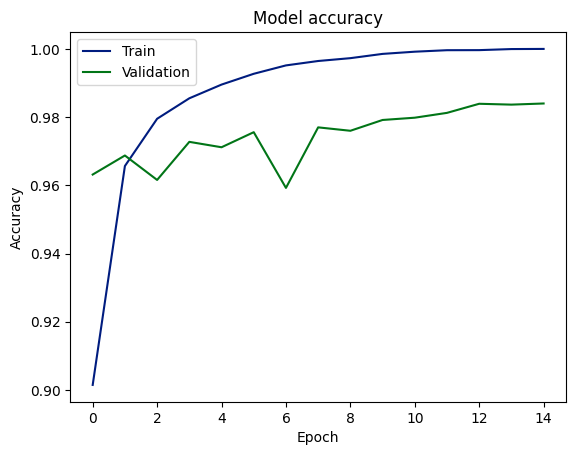

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
loss, acc = network.evaluate(test_images,
                         	test_labels, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9818 - loss: 0.0909

Test accuracy: 98.5%
